# Reflect Tables into SQLAlchemy ORM

In [1]:
# Import the dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [4]:
# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [5]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [6]:
# Assign each class to a corresponded variable 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Check the columns
Measurement.__dict__

mappingproxy({'__table__': Table('measurement', MetaData(), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurement'> at 2657d018ea0>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2650163e6b0>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2650163e750>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2657f2b9760>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2650163e840>,
       

In [8]:
# Check the columns
Station.__dict__

mappingproxy({'__table__': Table('station', MetaData(), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None),
              '__module__': 'sqlalchemy.ext.automap',
              '__doc__': None,
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.station'> at 26501606840>,
              '__init__': <function sqlalchemy.orm.instrumentation.__init__(self, **kwargs)>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x26501605120>,
              'station': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2650163ec00>,
              'name': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x2650163eca0>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttr

In [9]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Most recent Date
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date 

'2017-08-23'

** Design a query to retrieve the last 12 months of precipitation data and plot the results: 

In [11]:
# retrieve the last 12 months
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).\
            filter (Measurement.date >= query_date).filter (Measurement.date <= recent_date).all()
for result in results:
    print (result.date, result.prcp)
#results

2016-08-23 0.0
2016-08-24 0.08
2016-08-25 0.08
2016-08-26 0.0
2016-08-27 0.0
2016-08-28 0.01
2016-08-29 0.0
2016-08-30 0.0
2016-08-31 0.13
2016-09-01 0.0
2016-09-02 0.0
2016-09-03 0.0
2016-09-04 0.03
2016-09-05 None
2016-09-06 None
2016-09-07 0.05
2016-09-08 0.0
2016-09-09 0.03
2016-09-10 0.0
2016-09-11 0.05
2016-09-12 0.0
2016-09-13 0.02
2016-09-14 1.32
2016-09-15 0.42
2016-09-16 0.06
2016-09-17 0.05
2016-09-18 0.0
2016-09-19 0.0
2016-09-20 0.0
2016-09-21 0.0
2016-09-22 0.02
2016-09-23 0.0
2016-09-24 0.0
2016-09-25 0.0
2016-09-26 0.06
2016-09-27 0.02
2016-09-28 0.0
2016-09-29 0.0
2016-09-30 0.0
2016-10-01 0.0
2016-10-02 0.0
2016-10-03 0.0
2016-10-04 0.0
2016-10-05 0.0
2016-10-06 0.0
2016-10-07 0.0
2016-10-08 0.0
2016-10-09 0.0
2016-10-10 0.0
2016-10-11 0.0
2016-10-12 0.0
2016-10-13 0.0
2016-10-14 0.0
2016-10-15 0.0
2016-10-16 0.0
2016-10-17 0.01
2016-10-18 0.0
2016-10-19 0.0
2016-10-20 0.0
2016-10-21 0.05
2016-10-22 0.15
2016-10-23 0.01
2016-10-24 0.0
2016-10-25 0.03
2016-10-26 0.0
20

In [12]:
df = pd.DataFrame(results)
df.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [13]:
df = df.rename(columns={"date": "Date", "prcp": "Precipitation"})

df.head(15)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


In [14]:
# Convert 'Precipitation' column to numeric, coercing errors
df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce')

# Drop rows with NaN values in any column
df = df.dropna().reset_index(drop=True)
df.head (15)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


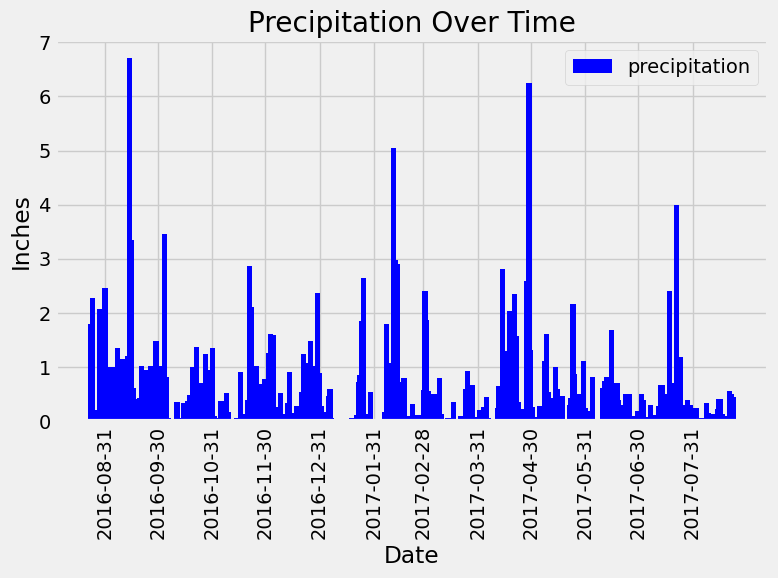

In [15]:
# Sort DataFrame by 'Date' column
df_plot = df.sort_values(by="Date")

# Convert 'Date' column to datetime
df_plot['Date'] = pd.to_datetime(df_plot['Date'])

# Use 'freq' parameter properly for monthly frequency (1 month)
selected_dates = pd.date_range(start=df_plot['Date'].min(), end=df_plot['Date'].max(), freq='1M')

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_plot["Date"], df_plot["Precipitation"], color='b', label = "precipitation", width = 3)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(selected_dates, rotation=90)
plt.title("Precipitation Over Time")
plt.grid(True)
plt.legend (loc = "upper right", fontsize = 14)
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = pd.DataFrame(df["Precipitation"].describe())
summary_statistics

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset

total_number_of_stations = session.query(Station.id).distinct().count()
total_number_of_stations

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sorted_data = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
sorted_data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Extract the most active station ID from the sorted data
most_active_station_id = sorted_data[0][0]  
Calculate = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter_by(station = most_active_station_id).all()
print(Calculate)

[(54.0, 85.0, 71.66378066378067)]


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_station_id).\
            filter (Measurement.date >= query_date).filter (Measurement.date <= recent_date). all()
for result in results:
    print (result.date, result.tobs)

2016-08-23 77.0
2016-08-24 77.0
2016-08-25 80.0
2016-08-26 80.0
2016-08-27 75.0
2016-08-28 73.0
2016-08-29 78.0
2016-08-30 77.0
2016-08-31 78.0
2016-09-01 80.0
2016-09-02 80.0
2016-09-03 78.0
2016-09-04 78.0
2016-09-05 78.0
2016-09-06 73.0
2016-09-07 74.0
2016-09-08 80.0
2016-09-09 79.0
2016-09-10 77.0
2016-09-11 80.0
2016-09-12 76.0
2016-09-13 79.0
2016-09-14 75.0
2016-09-15 79.0
2016-09-16 78.0
2016-09-17 79.0
2016-09-18 78.0
2016-09-19 78.0
2016-09-20 76.0
2016-09-21 74.0
2016-09-22 77.0
2016-09-23 78.0
2016-09-24 79.0
2016-09-25 79.0
2016-09-26 77.0
2016-09-27 80.0
2016-09-28 78.0
2016-09-29 78.0
2016-09-30 78.0
2016-10-01 77.0
2016-10-02 79.0
2016-10-03 79.0
2016-10-04 79.0
2016-10-05 79.0
2016-10-06 75.0
2016-10-07 76.0
2016-10-08 73.0
2016-10-09 72.0
2016-10-10 71.0
2016-10-11 77.0
2016-10-12 79.0
2016-10-13 78.0
2016-10-14 79.0
2016-10-15 77.0
2016-10-16 79.0
2016-10-17 77.0
2016-10-18 78.0
2016-10-19 78.0
2016-10-20 78.0
2016-10-21 78.0
2016-10-22 77.0
2016-10-23 74.0
2016-10-

In [21]:
df_Hist = pd.DataFrame(results, columns = ["Date","Temperature"])
df_Hist.head()

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


In [22]:
# Convert 'Temperature' column to numeric, coercing errors
df_Hist['Temperature'] = pd.to_numeric(df_Hist['Temperature'], errors='coerce')

# Drop rows with NaN values in any column
df_Hist = df_Hist.dropna().reset_index(drop=True)
df_Hist.head (5)

,Date,Temperature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


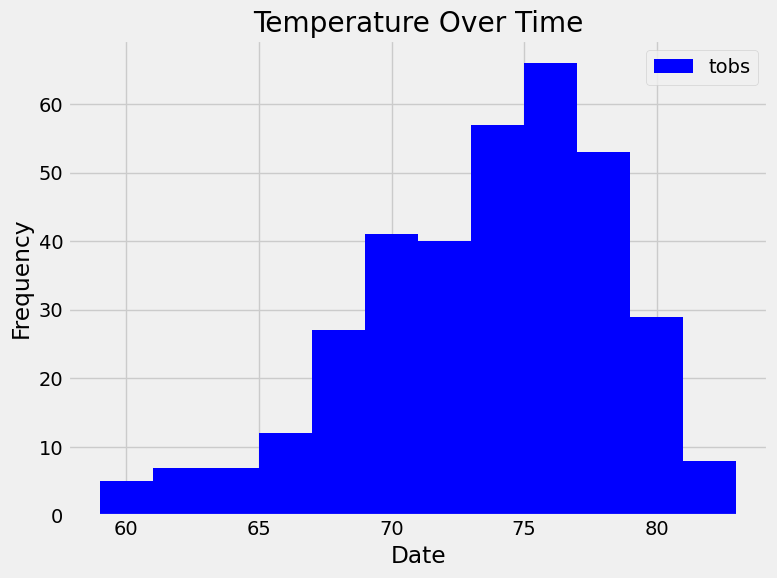

In [23]:
# Plotting the Histogram 
plt.figure(figsize=(8, 6))
plt.hist(df_Hist["Temperature"], color='b', label = "tobs", bins=12)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Temperature Over Time")
plt.legend (loc = "upper right", fontsize = 14)
plt.tight_layout()
plt.show()


In [24]:
# Close the session
session.close()